In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:

bank_train = pd.read_csv("data/bank_train.csv")
bank_train.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [46]:
bank_test = pd.read_csv("data/bank_test.csv")
bank_test.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,42442,52,entrepreneur,married,primary,no,657,no,no,telephone,7,dec,2,217,1,other
1,30164,34,blue-collar,married,secondary,no,0,yes,yes,cellular,5,feb,6,-1,0,unknown
2,9921,38,housemaid,divorced,primary,no,359,no,no,unknown,9,jun,4,-1,0,unknown
3,31817,58,blue-collar,married,primary,no,189,yes,no,telephone,8,apr,1,-1,0,unknown
4,10333,43,services,married,secondary,no,2478,yes,no,unknown,12,jun,1,-1,0,unknown


In [47]:
bank_test.shape

(1000, 16)

In [48]:
bank_train.shape

(44211, 17)

In [49]:
bank_train.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [50]:
bank_train.describe()

,Unnamed: 0,age,balance,day,campaign,pdays,previous
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,22614.856846,40.930040,1363.799462,15.811676,2.762751,40.210626,0.580715
std,13057.312051,10.620088,3052.574757,8.324843,3.094049,100.114045,2.311291
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11306.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22616.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33931.500000,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000


In [51]:

bank_train.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [52]:
bank_train.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

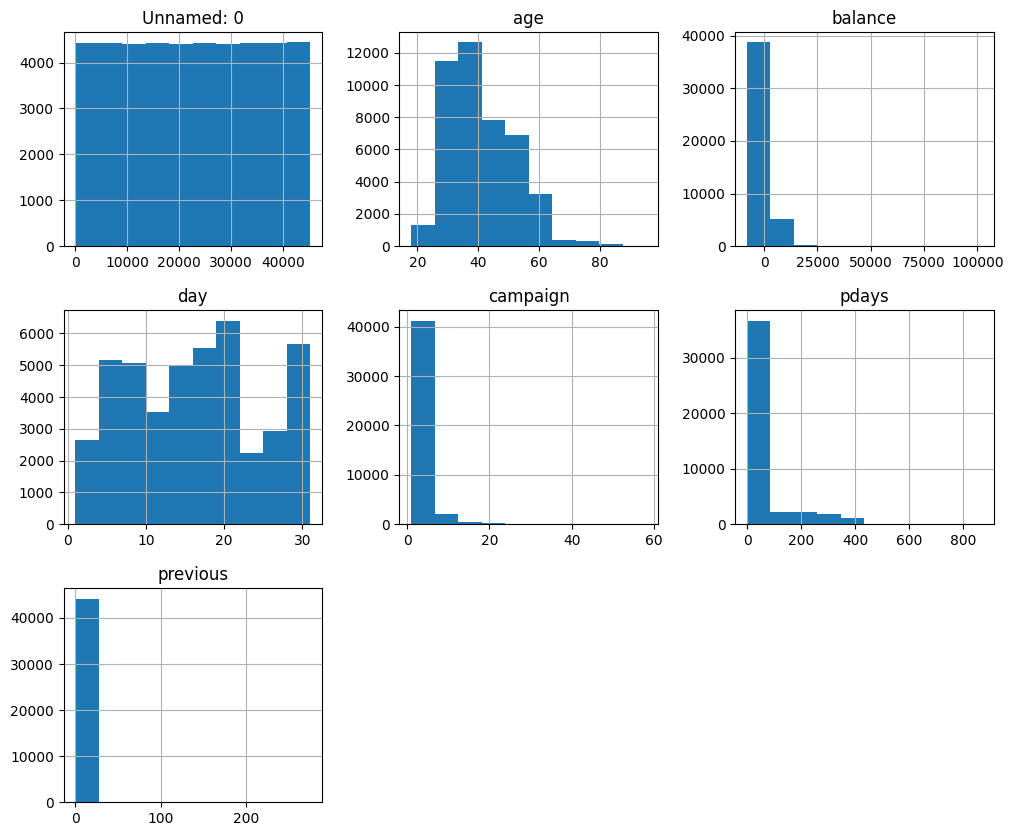

In [53]:

bank_train.hist(figsize=(12, 10))
plt.show()


#it shows that frequency of each column

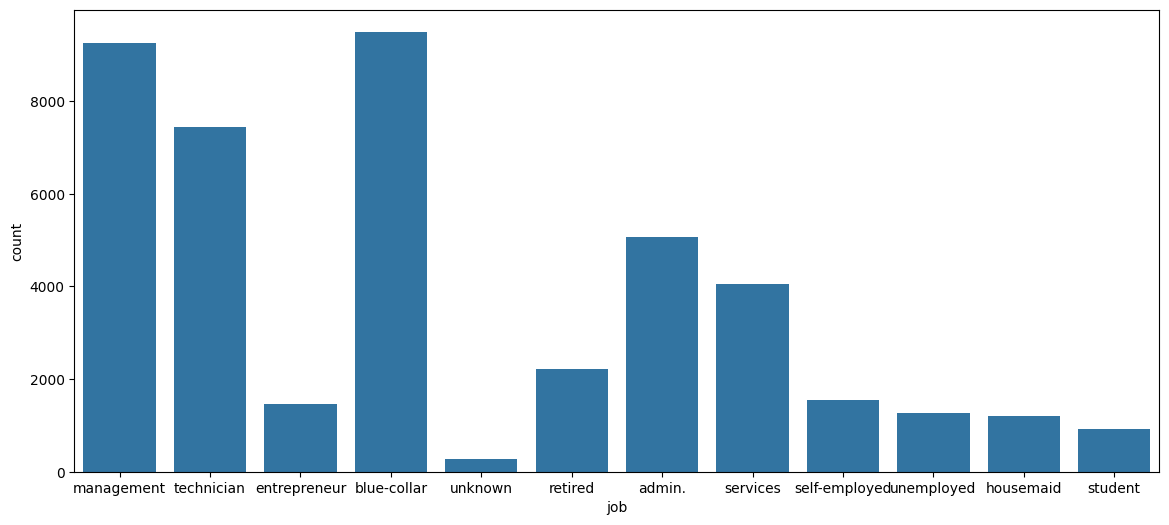

In [54]:
plt.figure(figsize=(14, 6))
sns.countplot(x='job', data=bank_train)
plt.show()


#above histogram its depicts the distribution of job across the diferent age groups

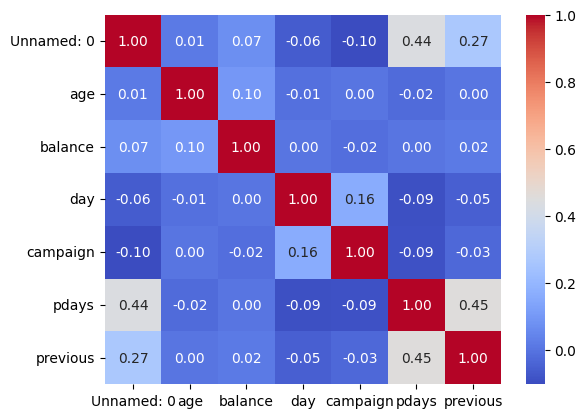

In [55]:
numeric_columns = bank_train.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



#it shows that correlation between different features.

In [56]:
bank_train.drop(['Unnamed: 0','marital','pdays','previous','day','contact','month'],axis=1, inplace=True)

In [57]:

bank_train_encode = pd.get_dummies(bank_train[['default', 'housing', 'loan']])

# Concatenate the encoded columns with the original DataFrame
bank_train_encoded = pd.concat([bank_train, bank_train_encode], axis=1)

# Drop the original categorical columns
bank_train_encoded.drop(['default', 'housing', 'loan'], axis=1, inplace=True)

# Display the resulting DataFrame
print(bank_train_encoded.head())


   age           job  education  balance  campaign poutcome   y  default_no  \
0   58    management   tertiary     2143         1  unknown  no        True   
1   44    technician  secondary       29         1  unknown  no        True   
2   33  entrepreneur  secondary        2         1  unknown  no        True   
3   47   blue-collar    unknown     1506         1  unknown  no        True   
4   33       unknown    unknown        1         1  unknown  no        True   

   default_yes  housing_no  housing_yes  loan_no  loan_yes  
0        False       False         True     True     False  
1        False       False         True     True     False  
2        False       False         True    False      True  
3        False       False         True     True     False  
4        False        True        False     True     False  


In [58]:
bank_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          44211 non-null  int64 
 1   job          44211 non-null  object
 2   education    44211 non-null  object
 3   balance      44211 non-null  int64 
 4   campaign     44211 non-null  int64 
 5   poutcome     44211 non-null  object
 6   y            44211 non-null  object
 7   default_no   44211 non-null  bool  
 8   default_yes  44211 non-null  bool  
 9   housing_no   44211 non-null  bool  
 10  housing_yes  44211 non-null  bool  
 11  loan_no      44211 non-null  bool  
 12  loan_yes     44211 non-null  bool  
dtypes: bool(6), int64(3), object(4)
memory usage: 2.6+ MB


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_train_encoded['job']=le.fit_transform(bank_train['job'])
bank_train_encoded['education']=le.fit_transform(bank_train['education'])
bank_train_encoded['poutcome']=le.fit_transform(bank_train['poutcome'])


In [60]:
bank_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          44211 non-null  int64 
 1   job          44211 non-null  int64 
 2   education    44211 non-null  int64 
 3   balance      44211 non-null  int64 
 4   campaign     44211 non-null  int64 
 5   poutcome     44211 non-null  int64 
 6   y            44211 non-null  object
 7   default_no   44211 non-null  bool  
 8   default_yes  44211 non-null  bool  
 9   housing_no   44211 non-null  bool  
 10  housing_yes  44211 non-null  bool  
 11  loan_no      44211 non-null  bool  
 12  loan_yes     44211 non-null  bool  
dtypes: bool(6), int64(6), object(1)
memory usage: 2.6+ MB


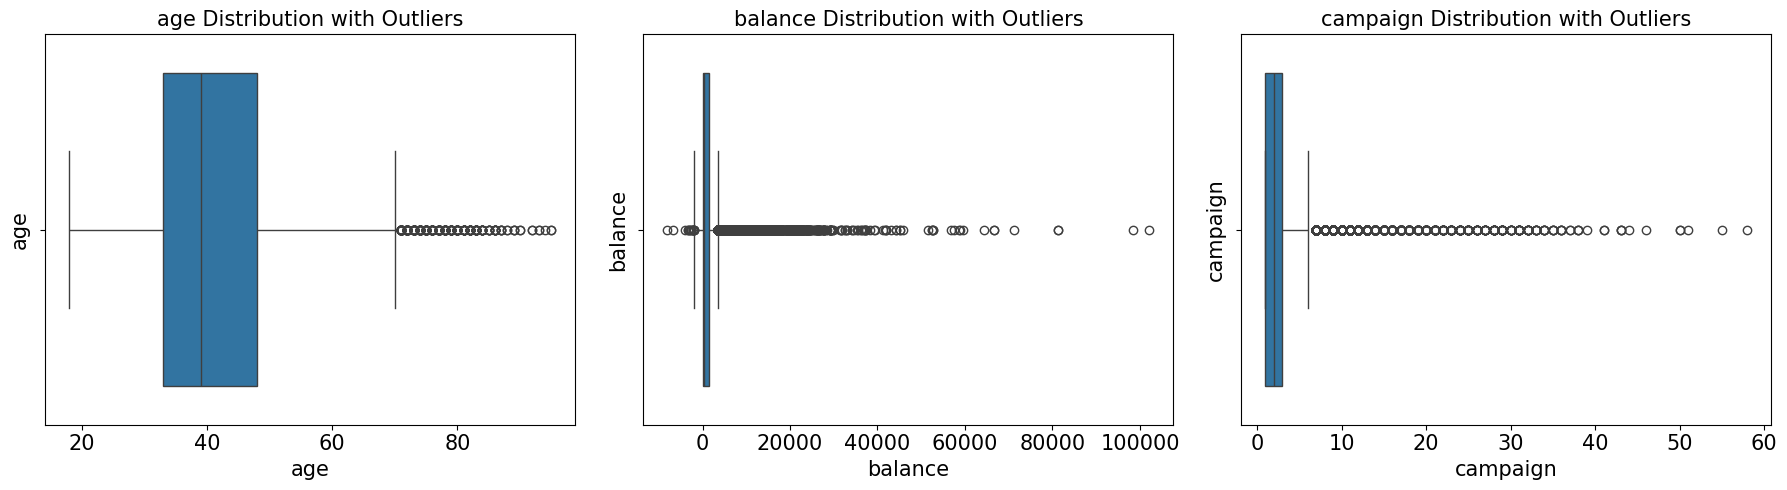

In [61]:
numeric_columns = bank_train.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(18, 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=bank_train[column], ax=axes[i])
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel(column, fontsize=15)
    axes[i].set_title(f'{column} Distribution with Outliers', fontsize=15)
    axes[i].tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()


#It generates the boxplots to visulize the distribution of numeric columns in dataset. It creates the boxplots showing the distribution of values and checks for outliers.

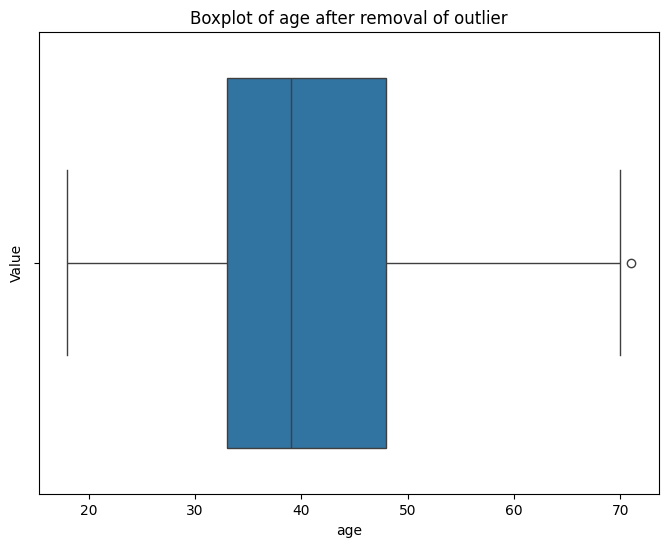

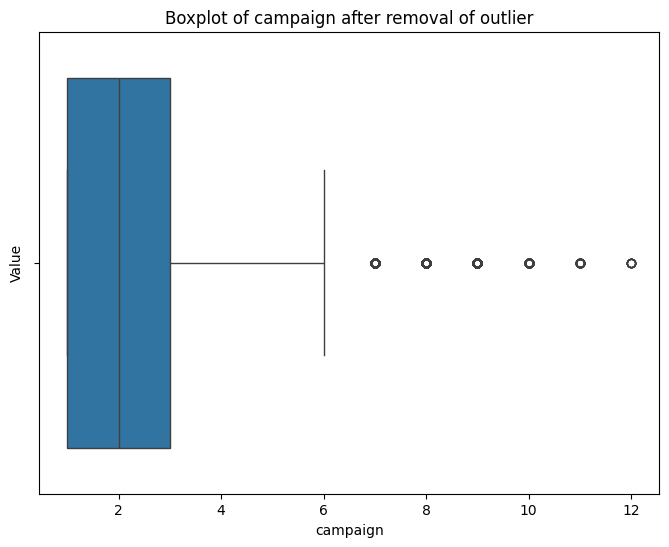

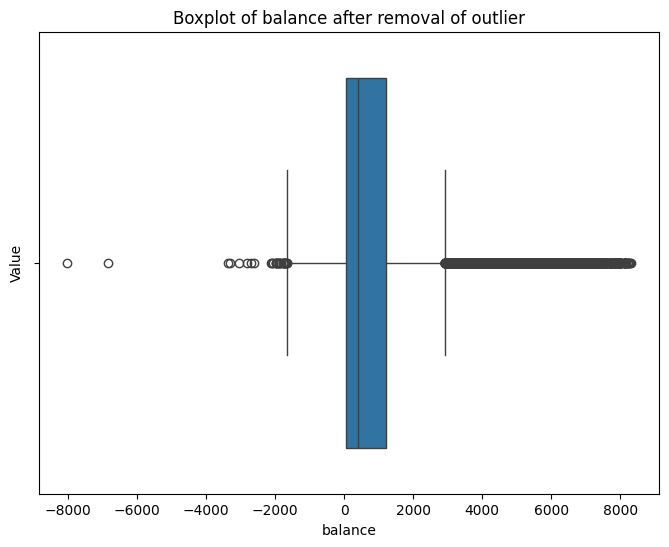

In [62]:
from sklearn.ensemble import IsolationForest
cols = ['age', 'campaign', 'balance']

iso_forest = IsolationForest(contamination=0.09, random_state=42)

iso_forest.fit(bank_train_encoded[cols])

outliers = iso_forest.predict(bank_train_encoded[cols])

bank_train_filtered = bank_train_encoded.loc[outliers == 1]


for col in cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=bank_train_filtered, x=col)
    plt.title(f'Boxplot of {col} after removal of outlier')
    plt.xlabel(col)
    plt.ylabel('Value')
plt.show()

In [63]:
bank_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40233 entries, 0 to 44210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          40233 non-null  int64 
 1   job          40233 non-null  int64 
 2   education    40233 non-null  int64 
 3   balance      40233 non-null  int64 
 4   campaign     40233 non-null  int64 
 5   poutcome     40233 non-null  int64 
 6   y            40233 non-null  object
 7   default_no   40233 non-null  bool  
 8   default_yes  40233 non-null  bool  
 9   housing_no   40233 non-null  bool  
 10  housing_yes  40233 non-null  bool  
 11  loan_no      40233 non-null  bool  
 12  loan_yes     40233 non-null  bool  
dtypes: bool(6), int64(6), object(1)
memory usage: 2.7+ MB


#It performs the one hot encoding on categorical features using get_dummies in teh dataset.

In [64]:
bank_train_filtered['y'].value_counts()

y
no     35641
yes     4592
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import RandomOverSampler

# Assuming df_filtered is your DataFrame containing the imbalanced data
# and 'y' is the target variable

# Separate features and target variable
X = bank_train_filtered.drop('y', axis=1)
y = bank_train_filtered['y']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())


y
no     35641
yes    35641
Name: count, dtype: int64


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())  
])


scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.72764256 0.59970541 0.51318743 0.54601571 0.53065376]
Mean cross-validation score: 0.5834409743550868


In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipeline1 = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier()) 
])

scores1 = cross_val_score(pipeline1, X_resampled, y_resampled, cv=5)

print("Cross-validation scores:", scores1)
print("Mean cross-validation score:", scores1.mean())


Cross-validation scores: [0.85508873 0.84723294 0.8082211  0.81039562 0.78149551]
Mean cross-validation score: 0.8204867799990664


In [68]:
bank_test_encode = pd.get_dummies(bank_test[['default', 'housing', 'loan']])

bank_test_encoded = pd.concat([bank_test, bank_test_encode], axis=1)

bank_test_encoded.drop(['default', 'housing', 'loan'], axis=1, inplace=True)
print(bank_test_encoded.head())


   Unnamed: 0  age           job   marital  education  balance    contact  \
0       42442   52  entrepreneur   married    primary      657  telephone   
1       30164   34   blue-collar   married  secondary        0   cellular   
2        9921   38     housemaid  divorced    primary      359    unknown   
3       31817   58   blue-collar   married    primary      189  telephone   
4       10333   43      services   married  secondary     2478    unknown   

   day month  campaign  pdays  previous poutcome  default_no  default_yes  \
0    7   dec         2    217         1    other        True        False   
1    5   feb         6     -1         0  unknown        True        False   
2    9   jun         4     -1         0  unknown        True        False   
3    8   apr         1     -1         0  unknown        True        False   
4   12   jun         1     -1         0  unknown        True        False   

   housing_no  housing_yes  loan_no  loan_yes  
0        True        False

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_test_encoded['job']=le.fit_transform(bank_test_encoded['job'])
bank_test_encoded['education']=le.fit_transform(bank_test_encoded['education'])
bank_test_encoded['poutcome']=le.fit_transform(bank_test_encoded['poutcome'])


In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

X = bank_train.drop('y', axis=1)
y = bank_train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

X_test_preprocessed = preprocessor.transform(X_test)
y_pred = clf.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      0.90      0.91      7854
         yes       0.30      0.33      0.31       989

    accuracy                           0.84      8843
   macro avg       0.61      0.61      0.61      8843
weighted avg       0.85      0.84      0.84      8843



In [ ]:
bank_test_preprocessed = preprocessor.transform(bank_test)
predictions_bank_test = clf.predict(bank_test_preprocessed)

predictions_bank_test_df = pd.DataFrame({'predicted_value': predictions_bank_test})
output_filename = 'answers.csv'
predictions_bank_test_df.to_csv(output_filename, index=False)